**DE LA CALLE AL HOGAR**

Explorando datos estadísticos sobre la adopción de perros rescatados.

# 1. HIPÓTESIS

¿Que queremos comprobar?

1. **Estado de situación de rescate**

El abandono es la principal causa del ingreso al refugio, siendo los perros jovenes los más perjudicados. Cual será la incidencia del extravío o perdida?

2. **La edad de los perros afecta la velocidad de adopción**

Los animales más jovenes tienden a ser adopatados más facilmente que los de mayor edad. También podemos analizar si existe algún patrón en relación al tiempo del animal en estado de adopción.

3. **Influencia de la raza en la adopción**

Algunas razas de perros son adoptados con mayor facilidad que otras, debido a factores culturales, esteriotipos o preferencias culturales.¿Existe el prejuicio de las razas "peligrosas"?



#2. DATA ACQUISITION

##Librerías

In [ ]:
# importar pandas
import pandas as pd

# librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

##Lectura de datos

In [ ]:
# lectura de archivos .csv alojados en github
# son 7 archivos, cada uno contiene una tabla

ruta_refugio = "https://raw.githubusercontent.com/gabrirys/DS_primera_pre-entrega/main/de_la_calle_al_hogar_refugio.csv"
ruta_perros = "https://raw.githubusercontent.com/gabrirys/DS_primera_pre-entrega/main/de_la_calle_al_hogar_perros.csv"
ruta_razas = "https://raw.githubusercontent.com/gabrirys/DS_primera_pre-entrega/main/de_la_calle_al_hogar_razas.csv"
ruta_ingresos = "https://raw.githubusercontent.com/gabrirys/DS_primera_pre-entrega/main/de_la_calle_al_hogar_ingreso.csv"
ruta_traslados = "https://raw.githubusercontent.com/gabrirys/DS_primera_pre-entrega/main/de_la_calle_al_hogar_traslado.csv"
ruta_retornos = "https://raw.githubusercontent.com/gabrirys/DS_primera_pre-entrega/main/de_la_calle_al_hogar_retorno.csv"
ruta_defuncion = "https://raw.githubusercontent.com/gabrirys/DS_primera_pre-entrega/main/de_la_calle_al_hogar_defunci%C3%B3n.csv"

# importamos cada archivo en un dataframe separado

df_refugio = pd.read_csv(ruta_refugio,sep=",")
df_perros = pd.read_csv(ruta_perros,sep=",")
df_razas = pd.read_csv(ruta_razas,sep=",")
df_ingresos = pd.read_csv(ruta_ingresos,sep=",")
df_traslados = pd.read_csv(ruta_traslados,sep=",")
df_retornos = pd.read_csv(ruta_retornos,sep=",")
df_defuncion = pd.read_csv(ruta_defuncion,sep=",")

In [ ]:
df_refugio

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,id_perro,fecha_ingreso,id_ingreso,fecha_traslado,id_traslado,fecha_retorno,id_retorno,fecha_defuncion,id_defuncion,estadía en refugio,estadía en hogar,nuevo hogar
0,1,17/01/2017,1,31/03/2017,2,01/04/2017,7.0,NaN,10,73,1.0,NO
1,2,27/01/2017,1,01/04/2017,1,NaN,NaN,NaN,10,64,NaN,SI
2,3,05/02/2017,12,05/04/2017,3,NaN,NaN,NaN,10,59,NaN,SI
3,4,14/02/2017,1,21/03/2017,2,09/04/2017,7.0,NaN,10,35,19.0,NO
4,5,16/02/2017,1,15/04/2017,1,12/07/2017,11.0,NaN,10,58,88.0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
2858,2859,23/08/2019,8,24/08/2019,3,NaN,NaN,NaN,10,1,NaN,SI
2859,2860,26/08/2019,10,26/08/2019,4,NaN,NaN,NaN,10,0,NaN,SI
2860,2861,29/08/2019,8,29/08/2019,3,NaN,NaN,NaN,10,0,NaN,SI
2861,2862,29/08/2019,8,30/08/2019,3,NaN,NaN,NaN,10,1,NaN,SI


In [ ]:
df_perros

,id_perro,id_raza,nombre,color_base,edad_detallada,edad,sexo,Edad segmentada
0,1,124,DINAH,Black,3 years 10 months.,3,Female,Adulto Joven
1,2,135,MARIA,Brown and Black,1 year 10 months.,1,Female,Cachorro
2,3,146,LOUISE VADA,Black,3 years 2 months.,3,Female,Adulto Joven
3,4,181,PRECIOUS,Ruddy,4 years 9 months.,4,Female,Adulto Joven
4,5,147,BEEMO,Blue,6 years 10 months.,6,Male,Adulto
...,...,...,...,...,...,...,...,...
2858,2859,123,LUNA,Tan and White,10 years 3 months.,10,Female,Adulto Mayor
2859,2860,54,LEO,Brindle and White,2 years 0 months.,2,Male,Cachorro
2860,2861,75,DOZER,Red,6 years 8 months.,6,Male,Adulto
2861,2862,23,LUCY FARMER,Tricolour,7 years 5 months.,7,Female,Adulto


In [ ]:
df_razas

,id_raza,razas,cantidad de perros por raza,cantidad de reubicados por raza,estadía promedio por raza,porcentaje de éxito nuevo hogar,tamaño,familia,entrenamiento,relación,energía,mantenimiento
0,1,Affenpinscher,3.0,3,2.0,100 %,s,5,2,4,4,2
1,2,Affenpinscher/Mix,3.0,2,15.0,67 %,s,5,2,4,4,2
2,3,Airedale Terrier,1.0,1,0.0,100 %,l,4,4,4,5,3
3,4,Airedale Terrier/Mix,NaN,0,NaN,0 %,l,4,4,4,5,3
4,5,Akita,2.0,1,3.0,50 %,l,5,2,1,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
197,198,Weimaraner/Mix,5.0,3,14.0,60 %,l,5,4,3,5,4
198,199,West Highland White Terrier,8.0,3,4.0,38 %,s,5,3,3,4,3
199,200,Wire-haired Pointing Griffon,1.0,1,4.0,100 %,l,5,5,3,5,3
200,201,Yorkshire Terrier,22.0,21,8.0,95 %,s,5,4,3,4,4


In [ ]:
df_ingresos

,id_ingreso,estado_ingreso,cantidad por tipo de ingreso
0,1,Abandonado,93
1,2,Abuso/Negligencia,11
2,3,Alergias,11
3,4,Alojamiento inadecuado,101
4,5,Asistencia de policía,134
5,6,Encontrado en basura,108
6,7,Enfermo/Lesionado,21
7,8,Extraviado,1440
8,9,Fallecimiento de propietario,50
9,10,Incompatibilidad con estilo de vida,370


In [ ]:
df_traslados

,id_traslado,estado_traslado,cantidad por tipo de traslado
0,1,Adopción,1483
1,2,Crianza,332
2,3,Reclamado,993
3,4,Transferido,55


In [ ]:
df_retornos

,id_retorno,estado_retorno,cantidad por tipo de retorno
0,1,Abandonado,4
1,2,Abuso/Negligencia,1
2,3,Alergias,3
3,4,Alojamiento inadecuado,14
4,5,Asistencia de policía,6
5,6,Enfermo/Lesionado,1
6,7,Extraviado,433
7,8,Fallecimiento de propietario,3
8,9,Incompatibilidad con estilo de vida,174
9,10,Incompatibilidad con mascotas,9


In [ ]:
df_defuncion

,id_defuncion,estado_defuncion,cantidad por tipo de defunción
0,1,Bajo tratamiento,2
1,2,Comportamiento/Conducta,7
2,3,Euthanasia por veterinaria,4
3,4,Intratable,21
4,5,Mordedura,13
5,6,Muertó a la llegada,5
6,7,Muertó bajo cuidado,4
7,8,Muertó en comunidad,1
8,9,Orden legal,1
9,10,Saludable,2797


## Análisis del datasets

In [ ]:
df_refugio.dtypes

id_perro                int64
fecha_ingreso          object
id_ingreso              int64
fecha_traslado         object
id_traslado             int64
fecha_retorno          object
id_retorno            float64
fecha_defuncion        object
id_defuncion            int64
estadía en refugio      int64
estadía en hogar      float64
nuevo hogar            object
dtype: object

El dataset dt_refugio es el que contiene los datos más significativos para el proyecto, por lo que sera el núcleo de nuestra base de datos a la cual le iremos agregando los datos del resto de los datasets.

In [ ]:
df_perros.dtypes

id_perro            int64
id_raza             int64
nombre             object
color_base         object
edad_detallada     object
edad                int64
sexo               object
Edad segmentada    object
dtype: object

In [ ]:
df_razas.dtypes

id_raza                              int64
razas                               object
cantidad de perros por raza        float64
cantidad de reubicados por raza      int64
estadía promedio por raza          float64
porcentaje de éxito nuevo hogar     object
tamaño                              object
familia                              int64
entrenamiento                        int64
relación                             int64
energía                              int64
mantenimiento                        int64
dtype: object

#3. DATA WRANGLING I

Crearemos un solo data frame con la agregación de todos los archivos mediante el uso del MERGE. Utilizaremos como base **df_refugio** al que le iremos sumando todos los datos de uno a la vez. Llamaremos al nuevo data frame **df_merge**. Dejaremos fuera los datos del df_defucion porque no se creen necesarios para el análisis.

##3.1. Agregamos los datos del dataframe PERROS

In [ ]:
# Necesitamos saber el nombre de las columnas en el df PERROS

df_perros.columns

Index(['id_perro', 'id_raza', 'nombre', 'color_base', 'edad_detallada', 'edad',
       'sexo', 'Edad segmentada'],
      dtype='object')

In [ ]:
# Realizamos un MERGE con REFUGIO y comenzamos a construir nuestro df principal

df_merge = pd.merge(df_refugio, df_perros, on='id_perro', how='left')
df_merge

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,id_perro,fecha_ingreso,id_ingreso,fecha_traslado,id_traslado,fecha_retorno,id_retorno,fecha_defuncion,id_defuncion,estadía en refugio,estadía en hogar,nuevo hogar,id_raza,nombre,color_base,edad_detallada,edad,sexo,Edad segmentada
0,1,17/01/2017,1,31/03/2017,2,01/04/2017,7.0,NaN,10,73,1.0,NO,124,DINAH,Black,3 years 10 months.,3,Female,Adulto Joven
1,2,27/01/2017,1,01/04/2017,1,NaN,NaN,NaN,10,64,NaN,SI,135,MARIA,Brown and Black,1 year 10 months.,1,Female,Cachorro
2,3,05/02/2017,12,05/04/2017,3,NaN,NaN,NaN,10,59,NaN,SI,146,LOUISE VADA,Black,3 years 2 months.,3,Female,Adulto Joven
3,4,14/02/2017,1,21/03/2017,2,09/04/2017,7.0,NaN,10,35,19.0,NO,181,PRECIOUS,Ruddy,4 years 9 months.,4,Female,Adulto Joven
4,5,16/02/2017,1,15/04/2017,1,12/07/2017,11.0,NaN,10,58,88.0,NO,147,BEEMO,Blue,6 years 10 months.,6,Male,Adulto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,2859,23/08/2019,8,24/08/2019,3,NaN,NaN,NaN,10,1,NaN,SI,123,LUNA,Tan and White,10 years 3 months.,10,Female,Adulto Mayor
2859,2860,26/08/2019,10,26/08/2019,4,NaN,NaN,NaN,10,0,NaN,SI,54,LEO,Brindle and White,2 years 0 months.,2,Male,Cachorro
2860,2861,29/08/2019,8,29/08/2019,3,NaN,NaN,NaN,10,0,NaN,SI,75,DOZER,Red,6 years 8 months.,6,Male,Adulto
2861,2862,29/08/2019,8,30/08/2019,3,NaN,NaN,NaN,10,1,NaN,SI,23,LUCY FARMER,Tricolour,7 years 5 months.,7,Female,Adulto


In [ ]:
df_merge.shape

(2863, 19)

##3.2. Agregamos los datos del dataframe RAZAS

In [ ]:
# Columnas del dataframe RAZAS

df_razas.columns

Index(['id_raza', 'razas', 'cantidad de perros por raza',
       'cantidad de reubicados por raza', 'estadía promedio por raza',
       'porcentaje de éxito nuevo hogar', 'tamaño', 'familia', 'entrenamiento',
       'relación', 'energía', 'mantenimiento'],
      dtype='object')

In [ ]:
# Selección de las columnas del df RAZAS que deseo agregar

razas_columnas = df_razas[['id_raza', 'razas', 'estadía promedio por raza',
       'porcentaje de éxito nuevo hogar', 'tamaño', 'familia', 'entrenamiento',
       'relación', 'energía', 'mantenimiento']]

In [ ]:
# Realizamos el MERGE

df_merge = pd.merge(df_merge, razas_columnas, on='id_raza', how='left')
df_merge

,id_perro,fecha_ingreso,id_ingreso,fecha_traslado,id_traslado,fecha_retorno,id_retorno,fecha_defuncion,id_defuncion,estadía en refugio,...,Edad segmentada,razas,estadía promedio por raza,porcentaje de éxito nuevo hogar,tamaño,familia,entrenamiento,relación,energía,mantenimiento
0,1,17/01/2017,1,31/03/2017,2,01/04/2017,7.0,NaN,10,73,...,Adulto Joven,Labrador Retriever/Mix,11.0,74 %,l,5,5,5,5,4
1,2,27/01/2017,1,01/04/2017,1,NaN,NaN,NaN,10,64,...,Cachorro,Mix,8.0,94 %,m,4,4,4,4,3
2,3,05/02/2017,12,05/04/2017,3,NaN,NaN,NaN,10,59,...,Adulto Joven,Pit Bull Terrier,23.0,65 %,l,5,3,1,4,2
3,4,14/02/2017,1,21/03/2017,2,09/04/2017,7.0,NaN,10,35,...,Adulto Joven,Shepherd Dog,9.0,81 %,l,5,5,2,5,4
4,5,16/02/2017,1,15/04/2017,1,12/07/2017,11.0,NaN,10,58,...,Adulto,Pit Bull Terrier/Mix,20.0,57 %,l,5,3,1,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,2859,23/08/2019,8,24/08/2019,3,NaN,NaN,NaN,10,1,...,Adulto Mayor,Labrador Retriever,7.0,71 %,l,5,5,5,5,4
2859,2860,26/08/2019,10,26/08/2019,4,NaN,NaN,NaN,10,0,...,Cachorro,Bully Breed Mix,16.0,71 %,l,3,5,1,4,2
2860,2861,29/08/2019,8,29/08/2019,3,NaN,NaN,NaN,10,0,...,Adulto,Coonhound,42.0,71 %,l,3,3,5,4,2
2861,2862,29/08/2019,8,30/08/2019,3,NaN,NaN,NaN,10,1,...,Adulto,Beagle,11.0,73 %,m,5,1,3,4,1


In [ ]:
df_merge.shape

(2863, 28)

##3.3. Agregamoslos datos del dataframe TRASLADOS

In [ ]:
# Columnas del dataframe TRASLADOS

df_traslados.columns

Index(['id_traslado', 'estado_traslado', 'cantidad por tipo de traslado'], dtype='object')

In [ ]:
# Selección de las columnas del df TRASLADO que deseo agregar

traslado_columnas = df_traslados[['id_traslado', 'estado_traslado']]

In [ ]:
# Realizamos el MERGE

df_merge = pd.merge(df_merge, traslado_columnas, on='id_traslado', how='left')
df_merge

,id_perro,fecha_ingreso,id_ingreso,fecha_traslado,id_traslado,fecha_retorno,id_retorno,fecha_defuncion,id_defuncion,estadía en refugio,...,razas,estadía promedio por raza,porcentaje de éxito nuevo hogar,tamaño,familia,entrenamiento,relación,energía,mantenimiento,estado_traslado
0,1,17/01/2017,1,31/03/2017,2,01/04/2017,7.0,NaN,10,73,...,Labrador Retriever/Mix,11.0,74 %,l,5,5,5,5,4,Crianza
1,2,27/01/2017,1,01/04/2017,1,NaN,NaN,NaN,10,64,...,Mix,8.0,94 %,m,4,4,4,4,3,Adopción
2,3,05/02/2017,12,05/04/2017,3,NaN,NaN,NaN,10,59,...,Pit Bull Terrier,23.0,65 %,l,5,3,1,4,2,Reclamado
3,4,14/02/2017,1,21/03/2017,2,09/04/2017,7.0,NaN,10,35,...,Shepherd Dog,9.0,81 %,l,5,5,2,5,4,Crianza
4,5,16/02/2017,1,15/04/2017,1,12/07/2017,11.0,NaN,10,58,...,Pit Bull Terrier/Mix,20.0,57 %,l,5,3,1,4,2,Adopción
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,2859,23/08/2019,8,24/08/2019,3,NaN,NaN,NaN,10,1,...,Labrador Retriever,7.0,71 %,l,5,5,5,5,4,Reclamado
2859,2860,26/08/2019,10,26/08/2019,4,NaN,NaN,NaN,10,0,...,Bully Breed Mix,16.0,71 %,l,3,5,1,4,2,Transferido
2860,2861,29/08/2019,8,29/08/2019,3,NaN,NaN,NaN,10,0,...,Coonhound,42.0,71 %,l,3,3,5,4,2,Reclamado
2861,2862,29/08/2019,8,30/08/2019,3,NaN,NaN,NaN,10,1,...,Beagle,11.0,73 %,m,5,1,3,4,1,Reclamado


In [ ]:
df_merge.shape

(2863, 29)

##3.4. Agregamos los datos del data frame INGRESOS

In [ ]:
# Columnas del dataframe INGRESOS

df_ingresos.columns

Index(['id_ingreso', 'estado_ingreso', 'cantidad por tipo de ingreso'], dtype='object')

In [ ]:
# Selección de las columnas del df INGRESOS que deseo agregar

ingresos_columnas = df_ingresos[['id_ingreso', 'estado_ingreso']]

In [ ]:
# Realizamos el MERGE

df_merge = pd.merge(df_merge, ingresos_columnas, on='id_ingreso', how='left')
df_merge

,id_perro,fecha_ingreso,id_ingreso,fecha_traslado,id_traslado,fecha_retorno,id_retorno,fecha_defuncion,id_defuncion,estadía en refugio,...,estadía promedio por raza,porcentaje de éxito nuevo hogar,tamaño,familia,entrenamiento,relación,energía,mantenimiento,estado_traslado,estado_ingreso
0,1,17/01/2017,1,31/03/2017,2,01/04/2017,7.0,NaN,10,73,...,11.0,74 %,l,5,5,5,5,4,Crianza,Abandonado
1,2,27/01/2017,1,01/04/2017,1,NaN,NaN,NaN,10,64,...,8.0,94 %,m,4,4,4,4,3,Adopción,Abandonado
2,3,05/02/2017,12,05/04/2017,3,NaN,NaN,NaN,10,59,...,23.0,65 %,l,5,3,1,4,2,Reclamado,Monitoreo de rabia
3,4,14/02/2017,1,21/03/2017,2,09/04/2017,7.0,NaN,10,35,...,9.0,81 %,l,5,5,2,5,4,Crianza,Abandonado
4,5,16/02/2017,1,15/04/2017,1,12/07/2017,11.0,NaN,10,58,...,20.0,57 %,l,5,3,1,4,2,Adopción,Abandonado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,2859,23/08/2019,8,24/08/2019,3,NaN,NaN,NaN,10,1,...,7.0,71 %,l,5,5,5,5,4,Reclamado,Extraviado
2859,2860,26/08/2019,10,26/08/2019,4,NaN,NaN,NaN,10,0,...,16.0,71 %,l,3,5,1,4,2,Transferido,Incompatibilidad con estilo de vida
2860,2861,29/08/2019,8,29/08/2019,3,NaN,NaN,NaN,10,0,...,42.0,71 %,l,3,3,5,4,2,Reclamado,Extraviado
2861,2862,29/08/2019,8,30/08/2019,3,NaN,NaN,NaN,10,1,...,11.0,73 %,m,5,1,3,4,1,Reclamado,Extraviado


In [ ]:
df_merge.shape

(2863, 30)

##3.5. Agregamos los datos del data frame RETORNOS

In [ ]:
# Columnas del dataframe RETORNOS

df_retornos.columns

Index(['id_retorno', 'estado_retorno', 'cantidad por tipo de retorno'], dtype='object')

In [ ]:
# Selección de las columnas del df RETORNOS que deseo agregar

retornos_columnas = df_retornos[['id_retorno', 'estado_retorno']]

In [ ]:
# Realizamos el MERGE

df_merge = pd.merge(df_merge, retornos_columnas, on='id_retorno', how='left')
df_merge

,id_perro,fecha_ingreso,id_ingreso,fecha_traslado,id_traslado,fecha_retorno,id_retorno,fecha_defuncion,id_defuncion,estadía en refugio,...,porcentaje de éxito nuevo hogar,tamaño,familia,entrenamiento,relación,energía,mantenimiento,estado_traslado,estado_ingreso,estado_retorno
0,1,17/01/2017,1,31/03/2017,2,01/04/2017,7.0,NaN,10,73,...,74 %,l,5,5,5,5,4,Crianza,Abandonado,Extraviado
1,2,27/01/2017,1,01/04/2017,1,NaN,NaN,NaN,10,64,...,94 %,m,4,4,4,4,3,Adopción,Abandonado,NaN
2,3,05/02/2017,12,05/04/2017,3,NaN,NaN,NaN,10,59,...,65 %,l,5,3,1,4,2,Reclamado,Monitoreo de rabia,NaN
3,4,14/02/2017,1,21/03/2017,2,09/04/2017,7.0,NaN,10,35,...,81 %,l,5,5,2,5,4,Crianza,Abandonado,Extraviado
4,5,16/02/2017,1,15/04/2017,1,12/07/2017,11.0,NaN,10,58,...,57 %,l,5,3,1,4,2,Adopción,Abandonado,Monitoreo de rabia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,2859,23/08/2019,8,24/08/2019,3,NaN,NaN,NaN,10,1,...,71 %,l,5,5,5,5,4,Reclamado,Extraviado,NaN
2859,2860,26/08/2019,10,26/08/2019,4,NaN,NaN,NaN,10,0,...,71 %,l,3,5,1,4,2,Transferido,Incompatibilidad con estilo de vida,NaN
2860,2861,29/08/2019,8,29/08/2019,3,NaN,NaN,NaN,10,0,...,71 %,l,3,3,5,4,2,Reclamado,Extraviado,NaN
2861,2862,29/08/2019,8,30/08/2019,3,NaN,NaN,NaN,10,1,...,73 %,m,5,1,3,4,1,Reclamado,Extraviado,NaN


In [ ]:
df_merge.shape

(2863, 31)

##3.6. Limpieza

Se opta por realizar una limpieza de los datos eliminando las columnas con valores identificatorios, las **id** y la columna **fecha_defuncion**, ya que no son de utilidad a la hora de realizar los análisis.

Estas son:

* id_ingreso
* id_retorno
* id_traslado
* id_defuncion
* id_raza
* fecha_defuncion

Dejaremos unicamente id_perro pero la trasformaremos en el índice.

In [ ]:
# eliminaremos las columnas utilizando el método "drop()"

df_merge.drop(
    columns=['id_ingreso', 'id_retorno', 'id_traslado', 'id_defuncion', 'id_raza', 'fecha_defuncion'],
    inplace=True)

In [ ]:
# verificamos que se hayan eliminado las columnas id

df_merge.columns

Index(['id_perro', 'fecha_ingreso', 'fecha_traslado', 'fecha_retorno',
       'estadía en refugio', 'estadía en hogar', 'nuevo hogar', 'nombre',
       'color_base', 'edad_detallada', 'edad', 'sexo', 'Edad segmentada',
       'razas', 'estadía promedio por raza', 'porcentaje de éxito nuevo hogar',
       'tamaño', 'familia', 'entrenamiento', 'relación', 'energía',
       'mantenimiento', 'estado_traslado', 'estado_ingreso', 'estado_retorno'],
      dtype='object')

#4. DATA TRANSFORMATION I

##4.1. Modificación de índice

Cambiamos el índice predeterminado por la columna **id_perro**

In [ ]:
# utilizamos el método set_index

df_merge.set_index('id_perro')

,fecha_ingreso,fecha_traslado,fecha_retorno,estadía en refugio,estadía en hogar,nuevo hogar,nombre,color_base,edad_detallada,edad,...,porcentaje de éxito nuevo hogar,tamaño,familia,entrenamiento,relación,energía,mantenimiento,estado_traslado,estado_ingreso,estado_retorno
id_perro,,,,,,,,,,,,,,,,,,,,,
1,17/01/2017,31/03/2017,01/04/2017,73,1.0,NO,DINAH,Black,3 years 10 months.,3,...,74 %,l,5,5,5,5,4,Crianza,Abandonado,Extraviado
2,27/01/2017,01/04/2017,NaN,64,NaN,SI,MARIA,Brown and Black,1 year 10 months.,1,...,94 %,m,4,4,4,4,3,Adopción,Abandonado,NaN
3,05/02/2017,05/04/2017,NaN,59,NaN,SI,LOUISE VADA,Black,3 years 2 months.,3,...,65 %,l,5,3,1,4,2,Reclamado,Monitoreo de rabia,NaN
4,14/02/2017,21/03/2017,09/04/2017,35,19.0,NO,PRECIOUS,Ruddy,4 years 9 months.,4,...,81 %,l,5,5,2,5,4,Crianza,Abandonado,Extraviado
5,16/02/2017,15/04/2017,12/07/2017,58,88.0,NO,BEEMO,Blue,6 years 10 months.,6,...,57 %,l,5,3,1,4,2,Adopción,Abandonado,Monitoreo de rabia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,23/08/2019,24/08/2019,NaN,1,NaN,SI,LUNA,Tan and White,10 years 3 months.,10,...,71 %,l,5,5,5,5,4,Reclamado,Extraviado,NaN
2860,26/08/2019,26/08/2019,NaN,0,NaN,SI,LEO,Brindle and White,2 years 0 months.,2,...,71 %,l,3,5,1,4,2,Transferido,Incompatibilidad con estilo de vida,NaN
2861,29/08/2019,29/08/2019,NaN,0,NaN,SI,DOZER,Red,6 years 8 months.,6,...,71 %,l,3,3,5,4,2,Reclamado,Extraviado,NaN


##4.2. Transformar tipo de datos

In [ ]:
df_merge.dtypes

id_perro                             int64
fecha_ingreso                       object
fecha_traslado                      object
fecha_retorno                       object
estadía en refugio                   int64
estadía en hogar                   float64
nuevo hogar                         object
nombre                              object
color_base                          object
edad_detallada                      object
edad                                 int64
sexo                                object
Edad segmentada                     object
razas                               object
estadía promedio por raza          float64
porcentaje de éxito nuevo hogar     object
tamaño                              object
familia                              int64
entrenamiento                        int64
relación                             int64
energía                              int64
mantenimiento                        int64
estado_traslado                     object
estado_ingr

Es necesario transformar los datos de las columnas **fecha_ingreso** y **fecha_traslado** a datatime.

In [ ]:
# Convertir las columnas de fechas a datetime

df_merge['fecha_ingreso'] = pd.to_datetime(df_merge['fecha_ingreso'], dayfirst=True)
df_merge['fecha_traslado'] = pd.to_datetime(df_merge['fecha_traslado'], dayfirst=True)
df_merge['fecha_retorno'] = pd.to_datetime(df_merge['fecha_retorno'], dayfirst=True)


# Verificar los cambios

df_merge[['fecha_ingreso', 'fecha_traslado', 'fecha_retorno']].dtypes

fecha_ingreso     datetime64[ns]
fecha_traslado    datetime64[ns]
fecha_retorno     datetime64[ns]
dtype: object

In [ ]:
df_merge[['fecha_ingreso', 'fecha_traslado', 'fecha_retorno']].head()

,fecha_ingreso,fecha_traslado,fecha_retorno
0,2017-01-17,2017-03-31,2017-04-01
1,2017-01-27,2017-04-01,NaT
2,2017-02-05,2017-04-05,NaT
3,2017-02-14,2017-03-21,2017-04-09
4,2017-02-16,2017-04-15,2017-07-12


Se necesita eliminar el símbolo de porcentaje % de los valores en la columna **porcentaje de éxito nuevo hogar** y luego transformar estos valores a tipo int.

In [ ]:
# eliminar el símbolo '%' y convertir a int

df_merge['porcentaje de éxito nuevo hogar'] = df_merge['porcentaje de éxito nuevo hogar'].str.replace('%', '').astype(int)


# verificar los cambios.

df_merge['porcentaje de éxito nuevo hogar'].head()

0    74
1    94
2    65
3    81
4    57
Name: porcentaje de éxito nuevo hogar, dtype: int64

#5. EDA

##5.1. Exploración inicial

In [ ]:
# información general del dataframe

df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2863 entries, 0 to 2862
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   id_perro                         2863 non-null   int64         
 1   fecha_ingreso                    2863 non-null   datetime64[ns]
 2   fecha_traslado                   2863 non-null   datetime64[ns]
 3   fecha_retorno                    746 non-null    datetime64[ns]
 4   estadía en refugio               2863 non-null   int64         
 5   estadía en hogar                 746 non-null    float64       
 6   nuevo hogar                      2863 non-null   object        
 7   nombre                           2863 non-null   object        
 8   color_base                       2863 non-null   object        
 9   edad_detallada                   2863 non-null   object        
 10  edad                             2863 non-null   int64      

In [ ]:
# descripción estadística de las columnas numéricas

df_merge.describe()

,id_perro,fecha_ingreso,fecha_traslado,fecha_retorno,estadía en refugio,estadía en hogar,edad,estadía promedio por raza,porcentaje de éxito nuevo hogar,familia,entrenamiento,relación,energía,mantenimiento
count,2863.000000,2863,2863,746,2863.000000,746.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.00000,2863.000000,2863.000000
mean,1432.000000,2018-05-30 23:45:55.012225024,2018-06-11 14:30:38.351379712,2018-07-10 03:22:40.857908992,11.614390,63.643432,3.992665,11.566189,73.962277,4.533706,3.936780,3.23402,4.097101,2.686343
min,1.000000,2017-01-17 00:00:00,2017-03-10 00:00:00,2017-04-01 00:00:00,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.00000,2.000000,1.000000
25%,716.500000,2017-10-12 00:00:00,2017-10-21 12:00:00,2017-12-09 00:00:00,1.000000,4.000000,1.000000,8.000000,67.000000,4.000000,3.000000,2.00000,4.000000,2.000000
50%,1432.000000,2018-06-05 00:00:00,2018-06-15 00:00:00,2018-07-14 12:00:00,7.000000,18.000000,2.000000,11.000000,74.000000,5.000000,4.000000,3.00000,4.000000,2.000000
75%,2147.500000,2019-01-11 00:00:00,2019-01-23 00:00:00,2019-03-05 00:00:00,15.000000,57.750000,6.000000,13.000000,81.000000,5.000000,5.000000,5.00000,5.000000,4.000000
max,2863.000000,2019-08-30 00:00:00,2019-08-30 00:00:00,2019-08-30 00:00:00,596.000000,750.000000,56.000000,45.000000,100.000000,5.000000,5.000000,5.00000,5.000000,5.000000
std,826.621235,NaN,NaN,NaN,20.431323,115.492997,4.334174,6.141393,13.597873,0.777141,1.180371,1.40370,0.815427,0.973502


In [ ]:
# descripción de los tipos de datos

df_merge.dtypes

id_perro                                    int64
fecha_ingreso                      datetime64[ns]
fecha_traslado                     datetime64[ns]
fecha_retorno                      datetime64[ns]
estadía en refugio                          int64
estadía en hogar                          float64
nuevo hogar                                object
nombre                                     object
color_base                                 object
edad_detallada                             object
edad                                        int64
sexo                                       object
Edad segmentada                            object
razas                                      object
estadía promedio por raza                 float64
porcentaje de éxito nuevo hogar            object
tamaño                                     object
familia                                     int64
entrenamiento                               int64
relación                                    int64


Como resultado de las operaciones se obtuvo un dataset que esta conformado por 2863 registros, estructurados en 31 columnas, con diversos tipos de datos, categóricos y numéricos.

##5.2. Verificaión de Duplicados

In [ ]:
# verificamos la existencia de valores duplicados

df_merge.duplicated().sum()

0

No existen valores duplicados

##5.3. Verificación de nulos

In [ ]:
# comprobamos la cantidad de valores nulos en cada columna

df_merge.isnull().sum()

id_perro                              0
fecha_ingreso                         0
fecha_traslado                        0
fecha_retorno                      2117
estadía en refugio                    0
estadía en hogar                   2117
nuevo hogar                           0
nombre                                0
color_base                            0
edad_detallada                        0
edad                                  0
sexo                                  0
Edad segmentada                       0
razas                                 0
estadía promedio por raza             0
porcentaje de éxito nuevo hogar       0
tamaño                                0
familia                               0
entrenamiento                         0
relación                              0
energía                               0
mantenimiento                         0
estado_traslado                       0
estado_ingreso                        0
estado_retorno                     2116


Exsisten valores nulos en las columnas **fecha_retorno**, **estadía en hogar** y **estado_retorno**.

In [ ]:
# Verificación de suma de nulos

sum(df_merge.isnull().sum())

6350

In [ ]:
# utilizamos una función para determinar el porcentaje de los valores nulos

def nulos(df_merge):
  cant = len(df_merge)
  for col in df_merge.columns:
    print(col,':',round(df_merge[col].isnull().sum() * 100 / cant,2),'%')

nulos(df_merge)

id_perro : 0.0 %
fecha_ingreso : 0.0 %
fecha_traslado : 0.0 %
fecha_retorno : 73.94 %
estadía en refugio : 0.0 %
estadía en hogar : 73.94 %
nuevo hogar : 0.0 %
nombre : 0.0 %
color_base : 0.0 %
edad_detallada : 0.0 %
edad : 0.0 %
sexo : 0.0 %
Edad segmentada : 0.0 %
razas : 0.0 %
estadía promedio por raza : 0.0 %
porcentaje de éxito nuevo hogar : 0.0 %
tamaño : 0.0 %
familia : 0.0 %
entrenamiento : 0.0 %
relación : 0.0 %
energía : 0.0 %
mantenimiento : 0.0 %
estado_traslado : 0.0 %
estado_ingreso : 0.0 %
estado_retorno : 73.91 %


Se comprueba que existe una gran cantidad de valores nulos en las columnas ya detalladas. Se procedera a eliminar estas columnas ya que se determinó que no aportan información valiosa a los efectos de este análisis y sus posteriores aplicaciones, debido a que no se va a estudiar la incidencia del retorno al refugio de los perros luego de acceder a un hogar.

In [ ]:
# eliminaremos las columnas utilizando el método "drop()"

df_merge.drop(
    columns=['fecha_retorno', 'estadía en hogar', 'estado_retorno'],
    inplace=True)

##5.4. Análisis de columnas individuales (univariados)

In [ ]:
df_merge.columns

Index(['id_perro', 'fecha_ingreso', 'fecha_traslado', 'estadía en refugio',
       'nuevo hogar', 'nombre', 'color_base', 'edad_detallada', 'edad', 'sexo',
       'Edad segmentada', 'razas', 'estadía promedio por raza',
       'porcentaje de éxito nuevo hogar', 'tamaño', 'familia', 'entrenamiento',
       'relación', 'energía', 'mantenimiento', 'estado_traslado',
       'estado_ingreso'],
      dtype='object')

In [ ]:
df_merge.dtypes

id_perro                                    int64
fecha_ingreso                      datetime64[ns]
fecha_traslado                     datetime64[ns]
estadía en refugio                          int64
nuevo hogar                                object
nombre                                     object
color_base                                 object
edad_detallada                             object
edad                                        int64
sexo                                       object
Edad segmentada                            object
razas                                      object
estadía promedio por raza                 float64
porcentaje de éxito nuevo hogar             int64
tamaño                                     object
familia                                     int64
entrenamiento                               int64
relación                                    int64
energía                                     int64
mantenimiento                               int64


###5.4.1 Columnas categóricas

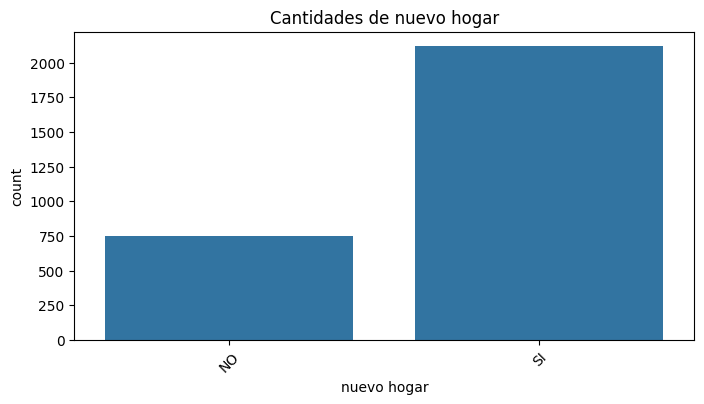

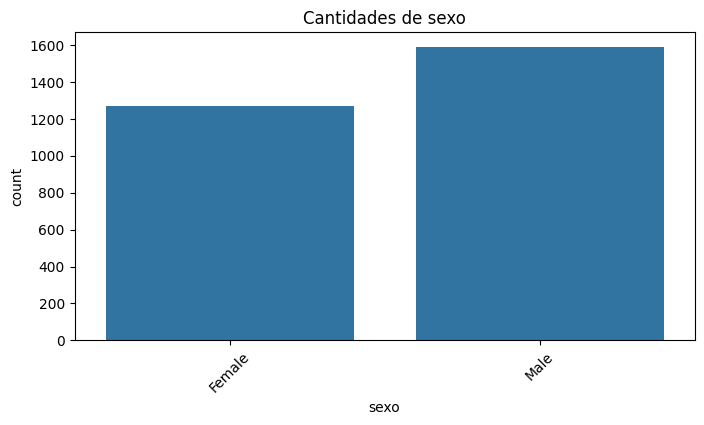

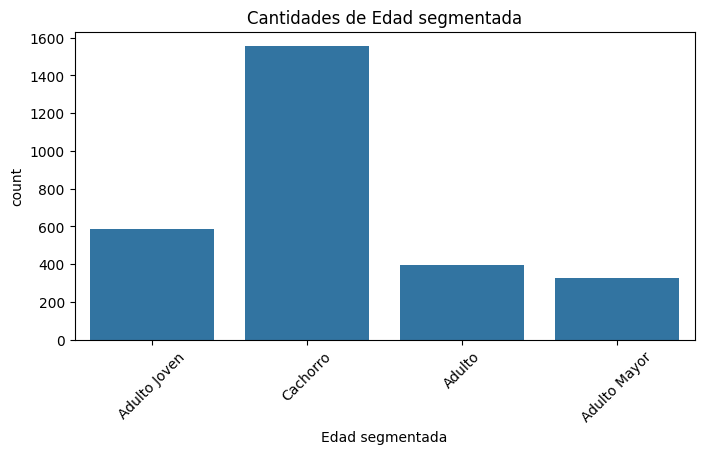

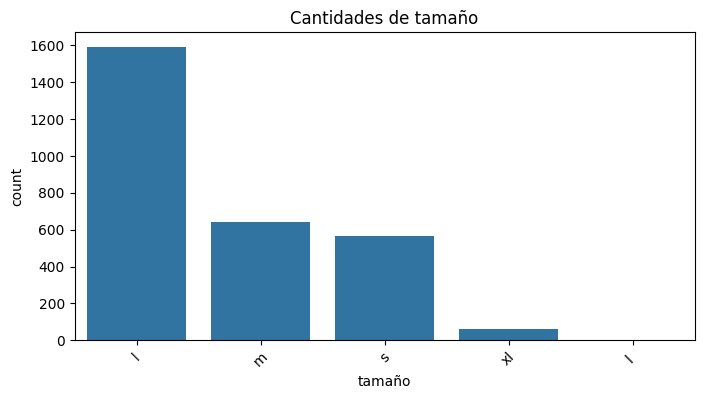

In [ ]:
# Ver distribución de valores únicos en columnas categóricas que nos interesan

columnas_cat = ['nuevo hogar', 'sexo', 'Edad segmentada', 'tamaño']

for column in columnas_cat:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df_merge, x=column)
    plt.title(f'Cantidades de {column}')
    plt.xticks(rotation=45)
    plt.show()

**Conclusiones preeliminares de las columnas categóricas:**

* 1-Es considerablemente mayor la cantidad de perros que lograron conseguir un hogar.
* 2-Predominan la cantidad de perros en edad de cachorro (hasta los 18 meses de edad)
* 3-Es destacable la supremacía de los perros de tamaño grande (L).

###5.4.2 Columnas numéricas

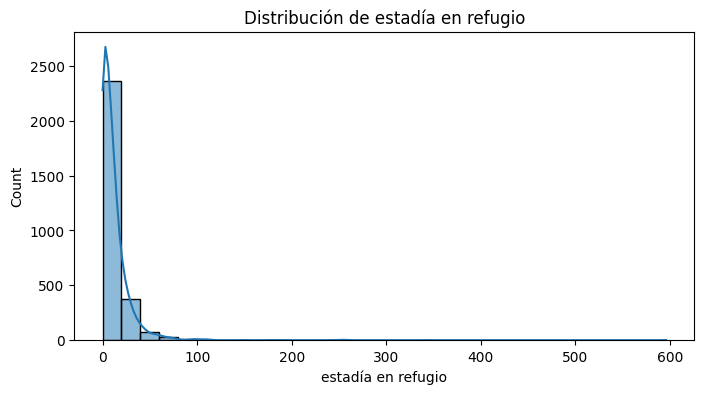

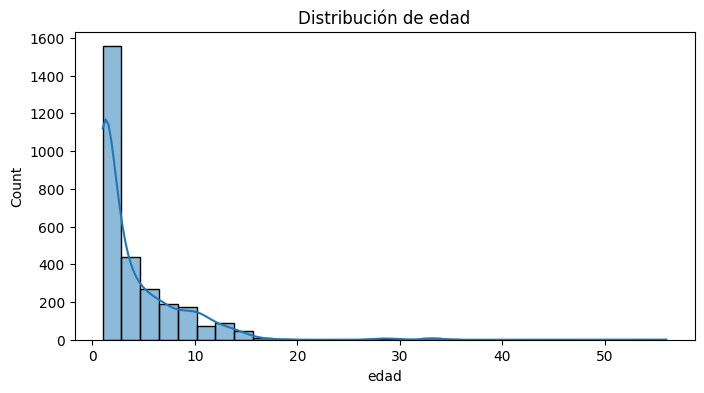

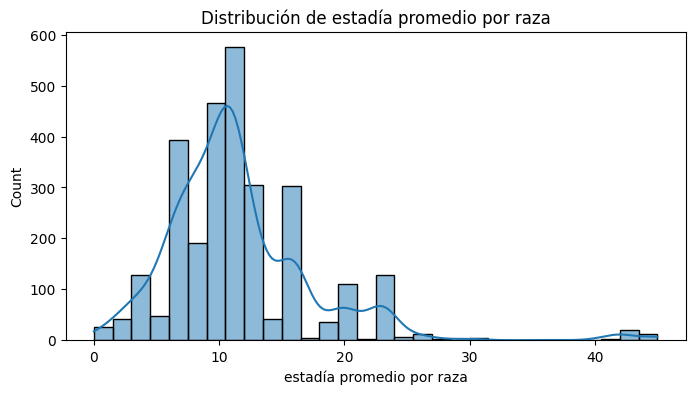

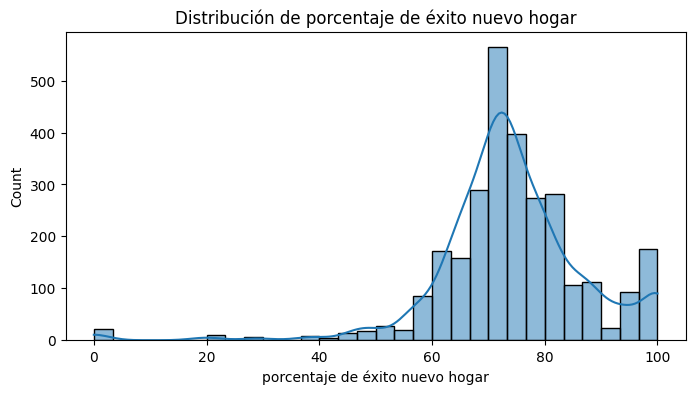

In [ ]:
# histograma de las columnas numéricas

columnas_num = [
    'estadía en refugio', 'edad', 'estadía promedio por raza',
    'porcentaje de éxito nuevo hogar']

for column in columnas_num:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_merge[column], bins=30, kde=True)
    plt.title(f'Distribución de {column}')
    plt.show()

**Conclusiones preeliminares de las columnas númericas:**

* Todas las variables presentan una distribución asimétrica. También se observan valores extremos.
* La gran mayoría de los perros pasa menos de 25 días en el refugio antes de conseguir hogar.
* La estadía promedio de las razas es entre 10 y 14 días.
* El porcentaje de éxito de un nuevo hogar entre los 60% y 80% es la predominancia.   


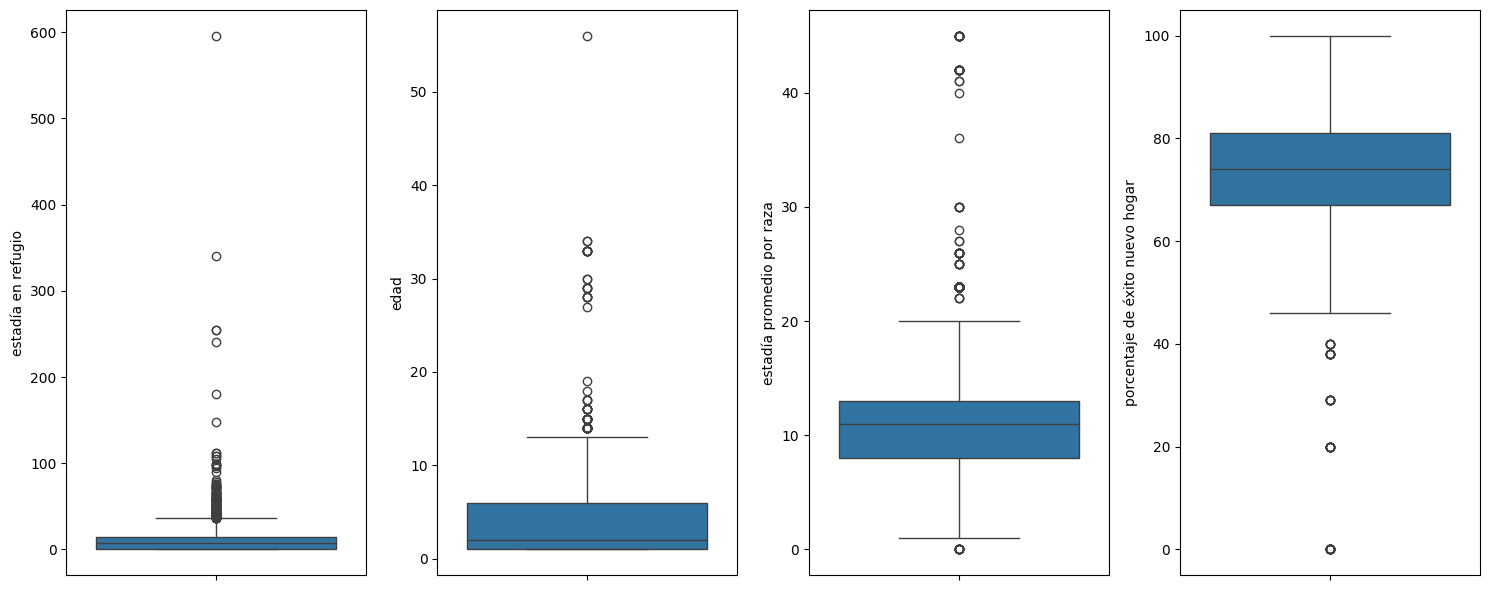

In [ ]:
# con la ayuda de los boxplot analizamos los outliers
# y mediante estas lineas de código podemos verlas todas juntas

fig, axes = plt.subplots(1, len(columnas_num), figsize=(15,6))

for ax, variable in zip(axes, columnas_num):
    ax = sns.boxplot( y=variable, data=df_merge, ax=ax)
plt.tight_layout()

Conlusiones del análisis de valores outliers:

* **Estadía en refugio**: Hay un gran número de valores atípicos que se extienden hasta aproximadamente 600 días. Esto sugiere que aunque la mayoría de los perros tienen una estadía corta, hay algunos casos extremos con estadías muy largas.

* **Edad**: Hay varios valores atípicos que van hasta más de 30 años. Esto podría indicar errores en los datos.

* **Estadía pormedio por raza**: Hay varios valores atípicos que van hasta aproximadamente 40 días. Esto sugiere que algunas razas pueden tener tiempos de estadía significativamente diferentes.

* **Porcentaje de éxito**: Hay algunos valores atípicos que caen por debajo del 50%. Esto sugiere que aunque la mayoría de los casos tienen un alto porcentaje de éxito, hay algunos casos con un éxito significativamente menor.



##5.5. Análisis de relaciones entre variables (bivariados)

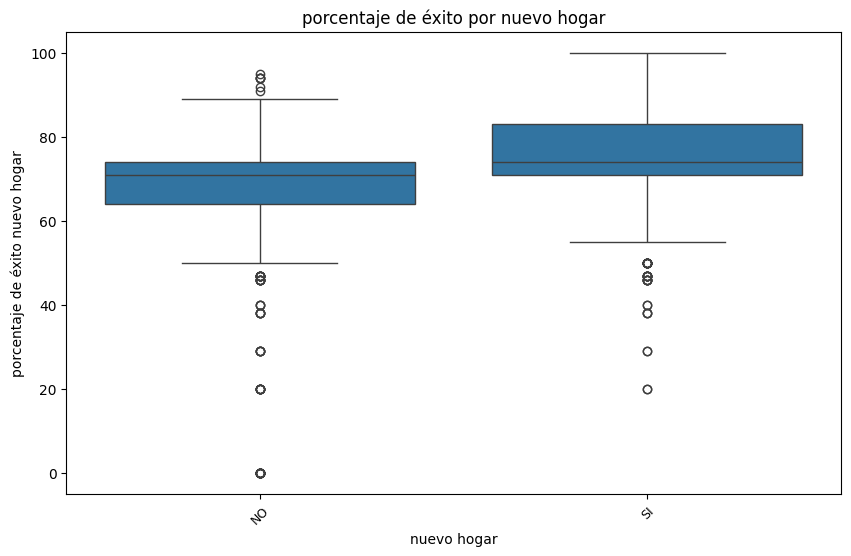

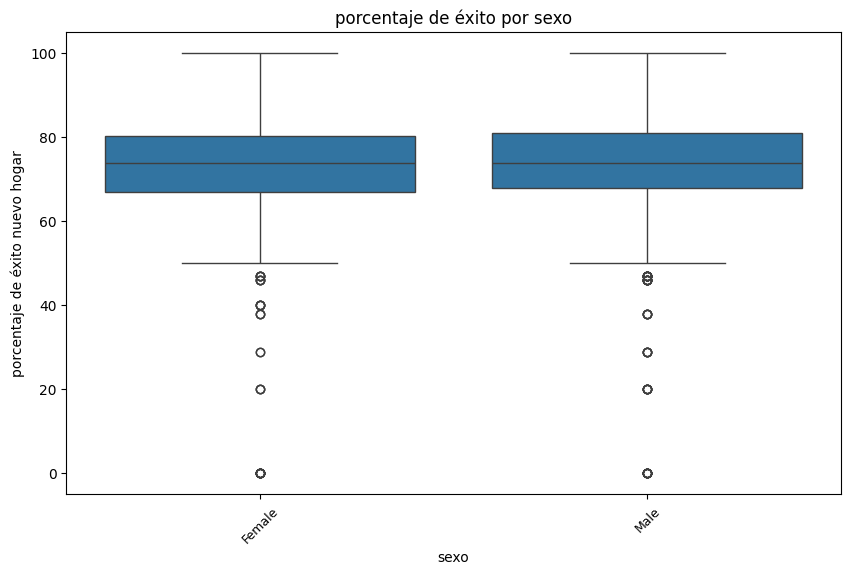

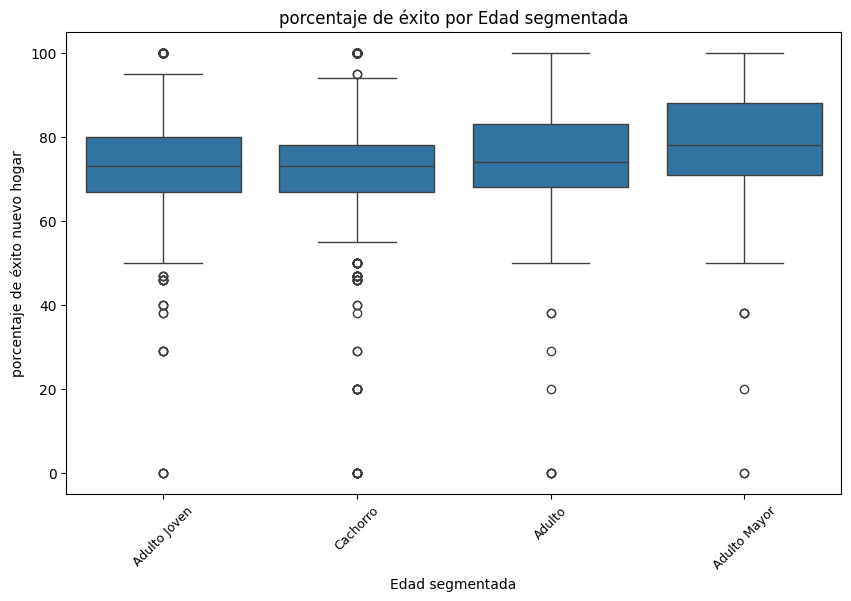

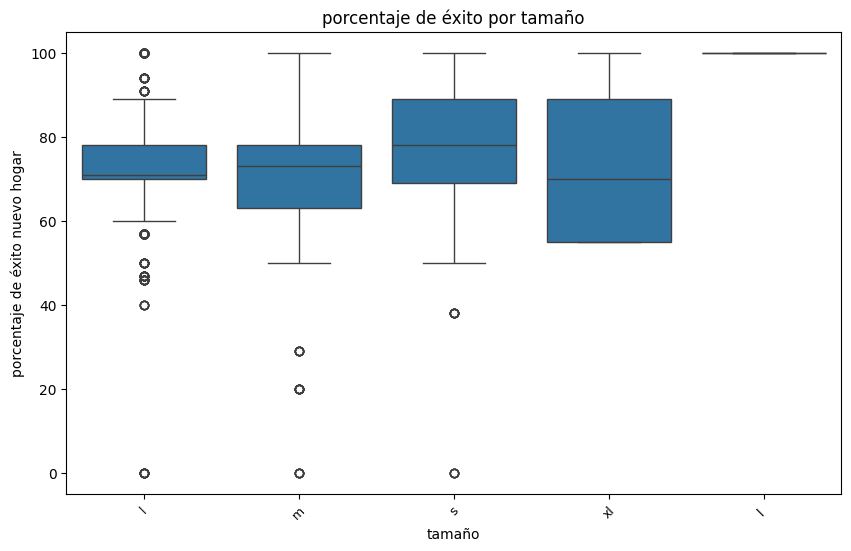

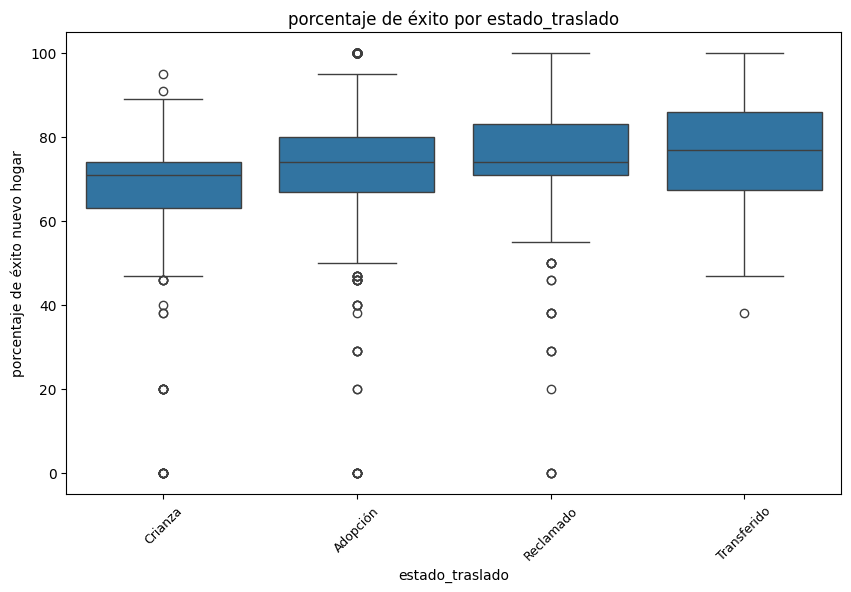

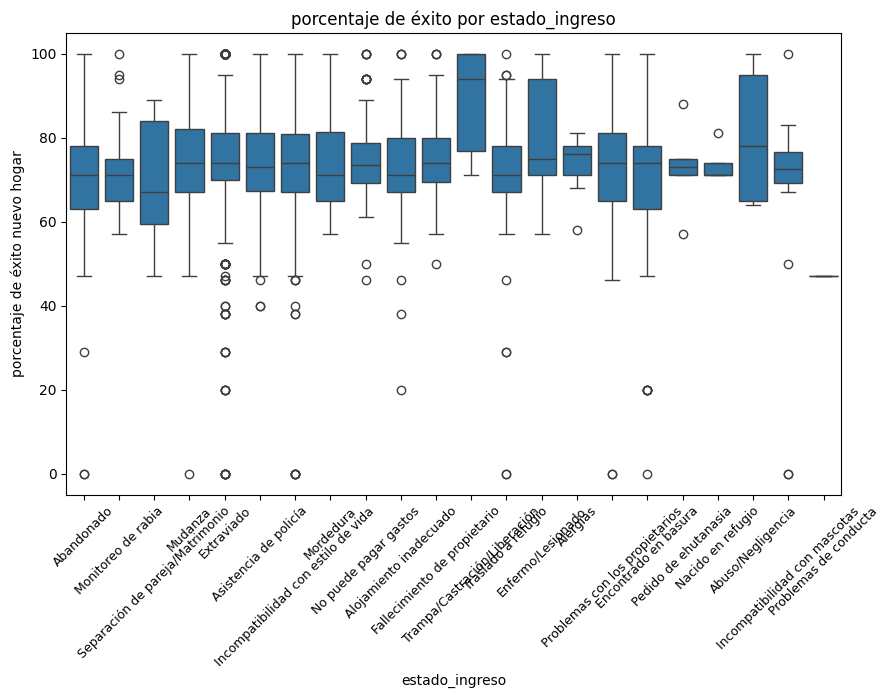

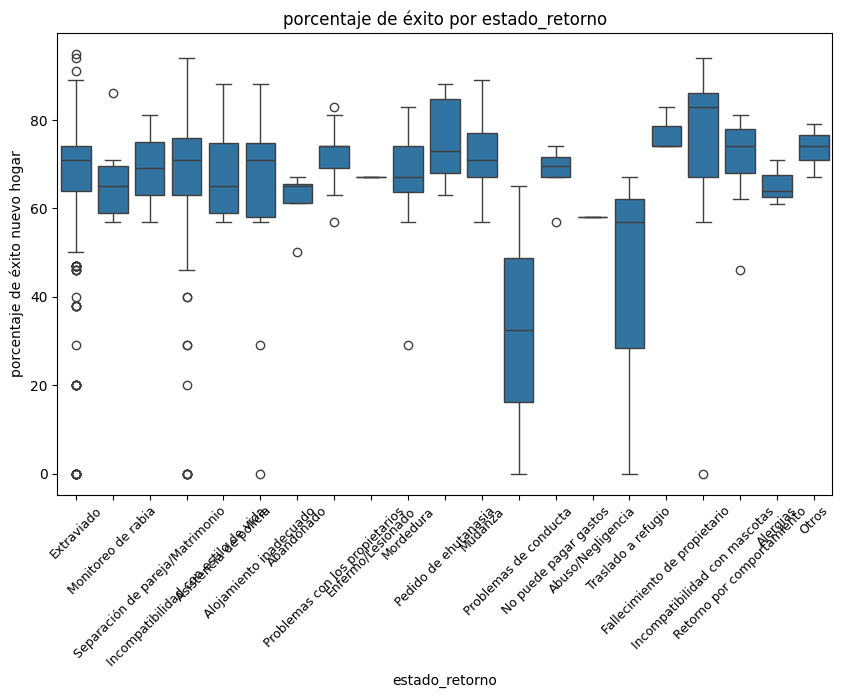

In [ ]:
# determino que columnas categóricas deseo analizar

columnas_box = [
    'nuevo hogar', 'sexo', 'Edad segmentada', 'tamaño',
    'estado_traslado', 'estado_ingreso', 'estado_retorno']


# boxplot de columnas categóricas vs numéricas

for column in columnas_box:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_merge[column], y=df_merge['porcentaje de éxito nuevo hogar'])
    plt.title(f'porcentaje de éxito por {column}')
    plt.xticks(rotation=45, fontsize=9)
    plt.show()

##5.6. Matriz de correlación

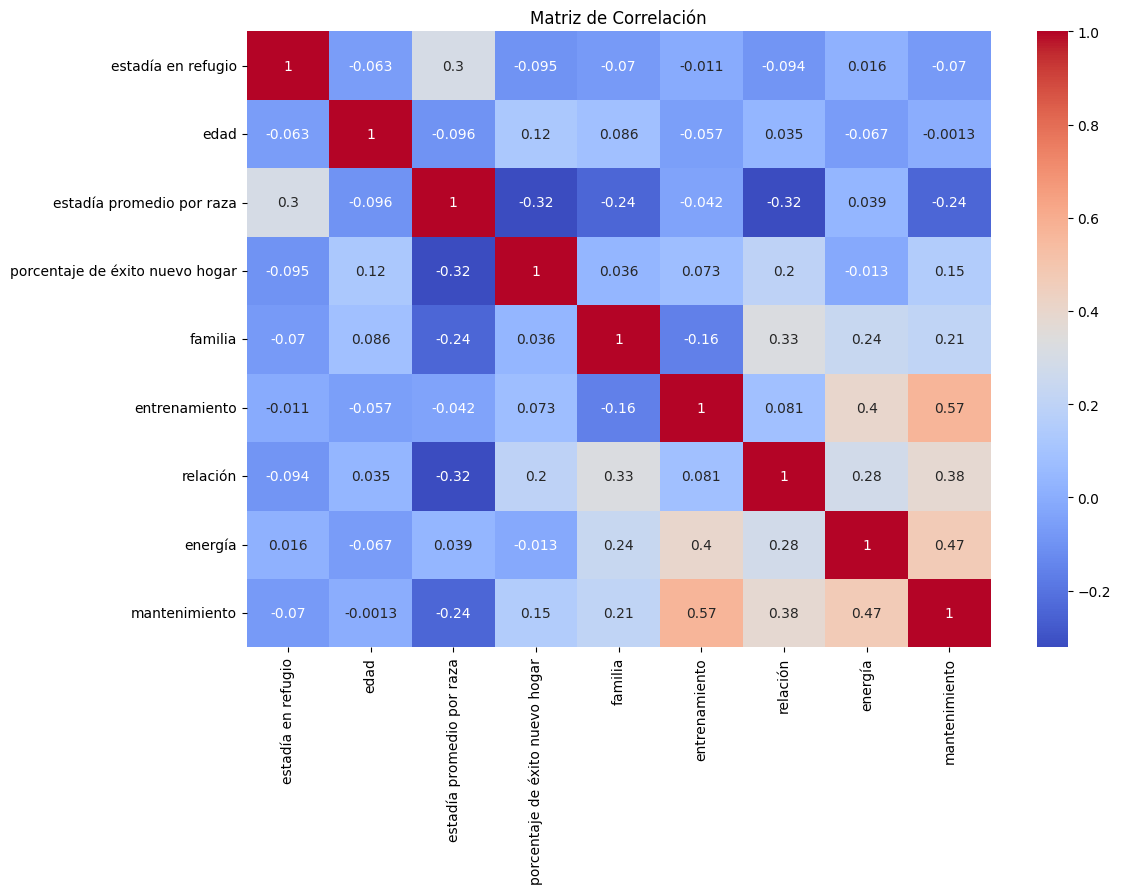

In [ ]:
# utilizamos un gráfico heatmap de seaborn para ver las realaciones entre variables

columnas_rel = [
    'estadía en refugio', 'edad', 'estadía promedio por raza',
    'porcentaje de éxito nuevo hogar', 'familia', 'entrenamiento',
       'relación', 'energía', 'mantenimiento']

plt.figure(figsize=(12, 8))
sns.heatmap(df_merge[columnas_rel].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Todas de las correlaciones en esta matriz son débiles (cerca de 0). Esto indica que no hay una fuerte relación lineal entre la mayoría de las variables en este conjunto de datos.

#6. DATA WRANGLING II


Corrección de los valores atípicos en la variable **edad**.

In [ ]:
# contar los valores únicos y su frecuencia

valores_edad = df_merge['edad'].value_counts()
valores_edad

edad
1     1083
2      472
3      266
4      174
5      147
6      121
7      110
10      86
9       85
8       81
11      73
12      45
13      41
14      29
15      18
33       7
16       6
28       4
29       4
17       3
34       2
30       2
56       1
18       1
19       1
27       1
Name: count, dtype: int64

Reemplazaremos los registros de la siguiente manera:

* Registros con valor 33 sera reemplazado por 3
* Valores entre 20 y 50 seran tomados como ingresados en formato meses en lugar de años.

In [ ]:
# se reemplaza el valor 33 por 3 en la columna 'edad'

df_merge['edad'] = df_merge['edad'].replace(33, 3)

# se reemplaza los valores superiores a 20 por su resultado de dividirlo entre 12

df_merge['edad'] = df_merge['edad'].replace(27, 2)
df_merge['edad'] = df_merge['edad'].replace(28, 2)
df_merge['edad'] = df_merge['edad'].replace(29, 2)
df_merge['edad'] = df_merge['edad'].replace(30, 2)
df_merge['edad'] = df_merge['edad'].replace(34, 3)
df_merge['edad'] = df_merge['edad'].replace(56, 5)


In [ ]:
# volvemos s contar los valores únicos y su frecuencia

valores_edad = df_merge['edad'].value_counts()
valores_edad

edad
1     1083
2      483
3      275
4      174
5      148
6      121
7      110
10      86
9       85
8       81
11      73
12      45
13      41
14      29
15      18
16       6
17       3
19       1
18       1
Name: count, dtype: int64

#7. GRÁFICOS

Se analizara cual es la principal razón o situación previa al rescate.

<ipython-input-56-25435b7952aa>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_merge, y='estado_ingreso', palette='viridis')


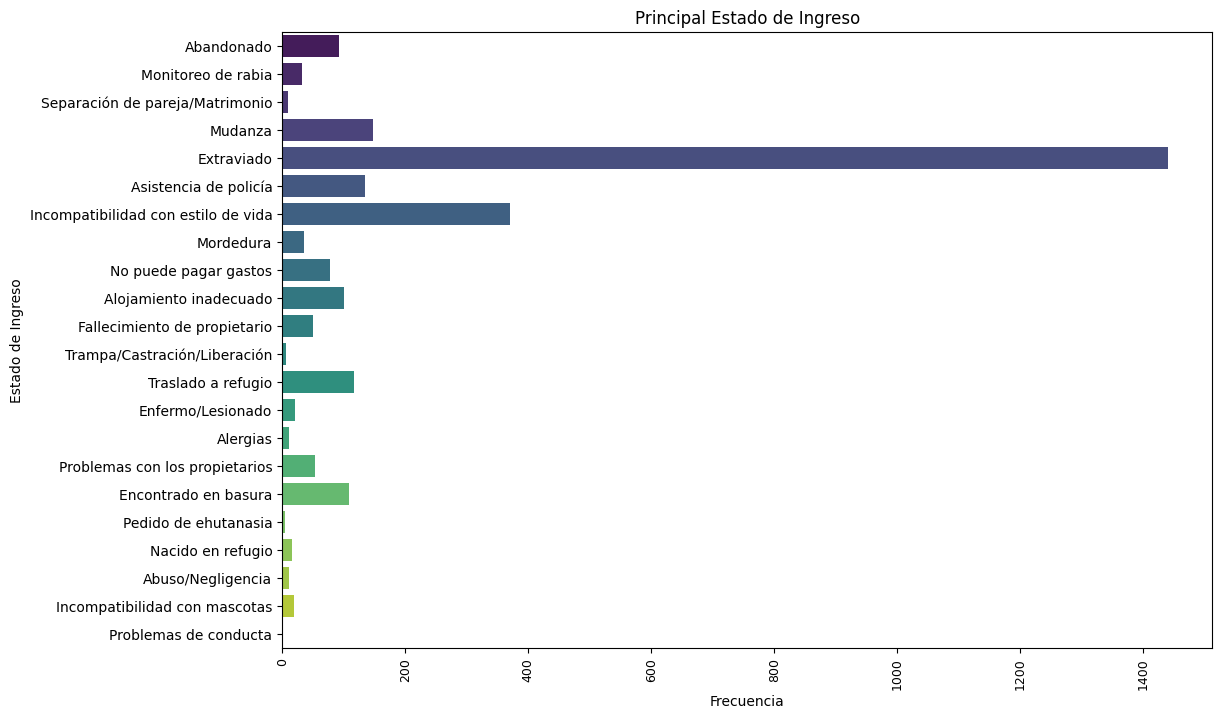

In [ ]:
# creamos el gráfico de barras con una paleta de colores para diferenciar los valores

plt.figure(figsize=(12, 8))
sns.countplot(data=df_merge, y='estado_ingreso', palette='viridis')
plt.title('Principal Estado de Ingreso')
plt.ylabel('Estado de Ingreso')
plt.xlabel('Frecuencia')
plt.xticks(rotation=90, fontsize=9)
plt.show()

**Se comprobó que el extravío es la
situación predominante que lleva a los animales a los
refugios.**

Comporbamos la relación entre la edad de los perros y su velocidad de adopción.

<ipython-input-59-f1e1cfac551b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_merge, x='Edad segmentada', y='estadía en refugio', palette='viridis')


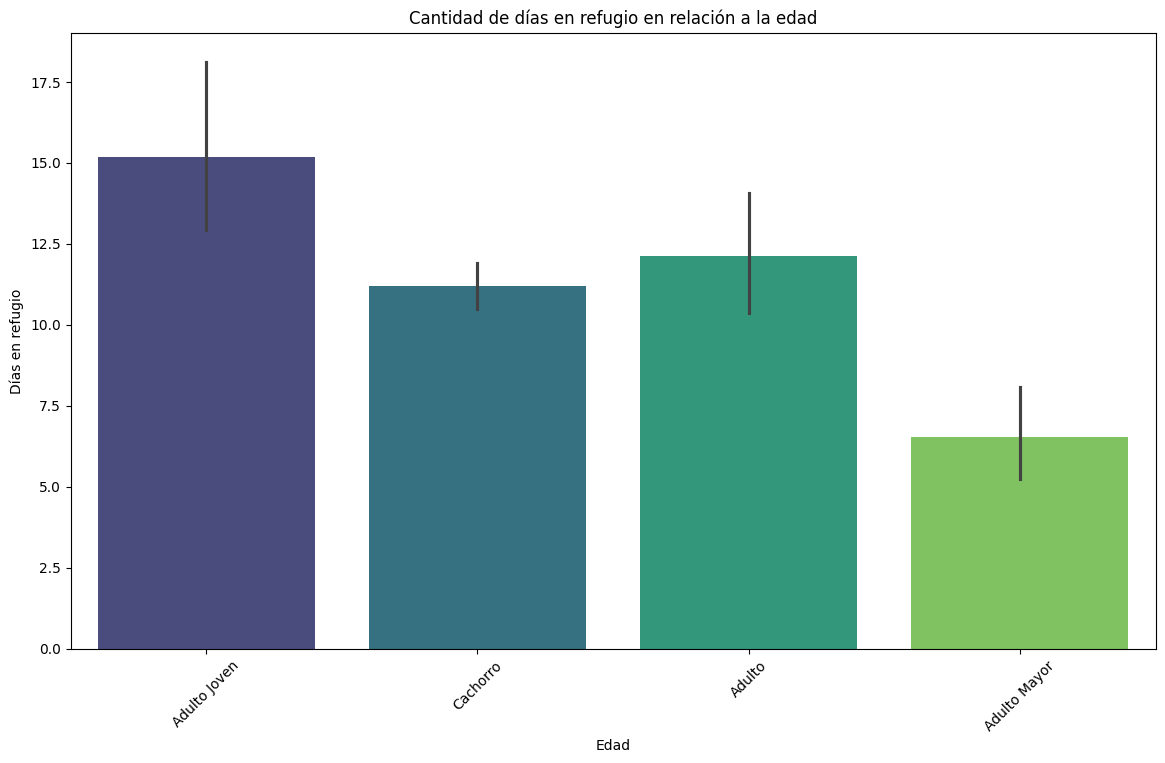

In [ ]:
# se crear un gráfico de barras agrupadas

plt.figure(figsize=(14, 8))
sns.barplot(data=df_merge, x='Edad segmentada', y='estadía en refugio', palette='viridis')
plt.title('Cantidad de días en refugio en relación a la edad')
plt.xlabel('Edad')
plt.ylabel('Días en refugio')
plt.xticks(rotation=45)
plt.show()

**Se encontró que la edad de los animales si
influye en su atractivo para los posibles adoptantes ya
que los adultos mayores tienden a ser adoptados más
rápidamente pasando un promedio de 6 días menos
en el refugio que los cachorros.**

Influencia de la raza en la adopción

In [ ]:
# priemro debemos contar el número de registros por raza
raza_conteo = df_merge['razas'].value_counts()
raza_conteo

razas
Labrador Retriever/Mix      261
Bully Breed Mix             231
Labrador Retriever          146
Pit Bull Terrier            120
Beagle                      120
                           ... 
Spitz                         1
Redbone Coonhound/Mix         1
Silky Terrier                 1
Havanese/Mix                  1
English Springer Spaniel      1
Name: count, Length: 198, dtype: int64

In [ ]:
# se filtrar razas con al menos 20 registros

raza_filtradas = raza_conteo[raza_conteo >= 20].index


# filtrar el DataFrame original para que solo incluya las razas filtradas

df_filtrado = df_merge[df_merge['razas'].isin(raza_filtradas)]


# utilizamos ese df_filtrado para filtrar y ordenar las 15 razas con mayor porcentaje de éxito en nuevo hogar

top_15_razas = df_filtrado.groupby('razas')['porcentaje de éxito nuevo hogar'].mean().sort_values(ascending=False).head(15).reset_index()
top_15_razas

,razas,porcentaje de éxito nuevo hogar
0,Yorkshire Terrier,95.0
1,Mix,94.0
2,Pug/Mix,88.0
3,German Shepherd Dog,86.0
4,Australian Shepherd/Mix,86.0
5,Husky,83.0
6,Shepherd Dog,81.0
7,Golden Retriever/Mix,80.0
8,Heeler Lancashire/Mix,79.0
9,Terrier,78.0


<ipython-input-69-bc8da720a738>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_15_razas, x='porcentaje de éxito nuevo hogar', y='razas', palette='viridis')


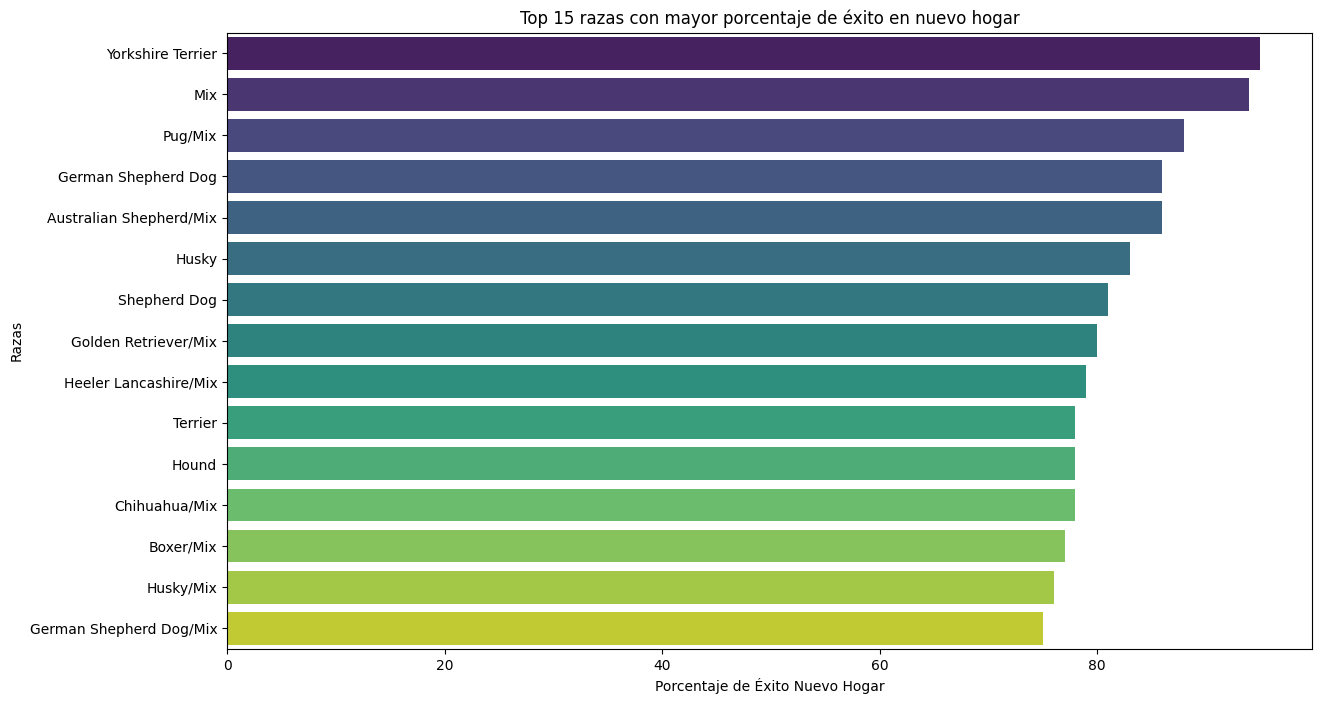

In [ ]:
# se crear el gráfico para razas con mayor éxito

plt.figure(figsize=(14, 8))
sns.barplot(data=top_15_razas, x='porcentaje de éxito nuevo hogar', y='razas', palette='viridis')
plt.title('Top 15 razas con mayor porcentaje de éxito en nuevo hogar')
plt.xlabel('Porcentaje de Éxito Nuevo Hogar')
plt.ylabel('Razas')
plt.show()

In [ ]:
top_15_bajo = df_filtrado.groupby('razas')['porcentaje de éxito nuevo hogar'].mean().sort_values(ascending=True).head(15).reset_index()
top_15_bajo

,razas,porcentaje de éxito nuevo hogar
0,Great Pyrenees,55.0
1,Pit Bull Terrier/Mix,57.0
2,Border Collie/Mix,61.0
3,Beagle/Mix,63.0
4,Pit Bull Terrier,65.0
5,Hound/Mix,67.0
6,Boxer,67.0
7,Chihuahua,68.0
8,Dachshund/Mix,70.0
9,Coonhound,71.0


<ipython-input-71-b1d75699ecf2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_15_bajo, x='porcentaje de éxito nuevo hogar', y='razas', palette='viridis')


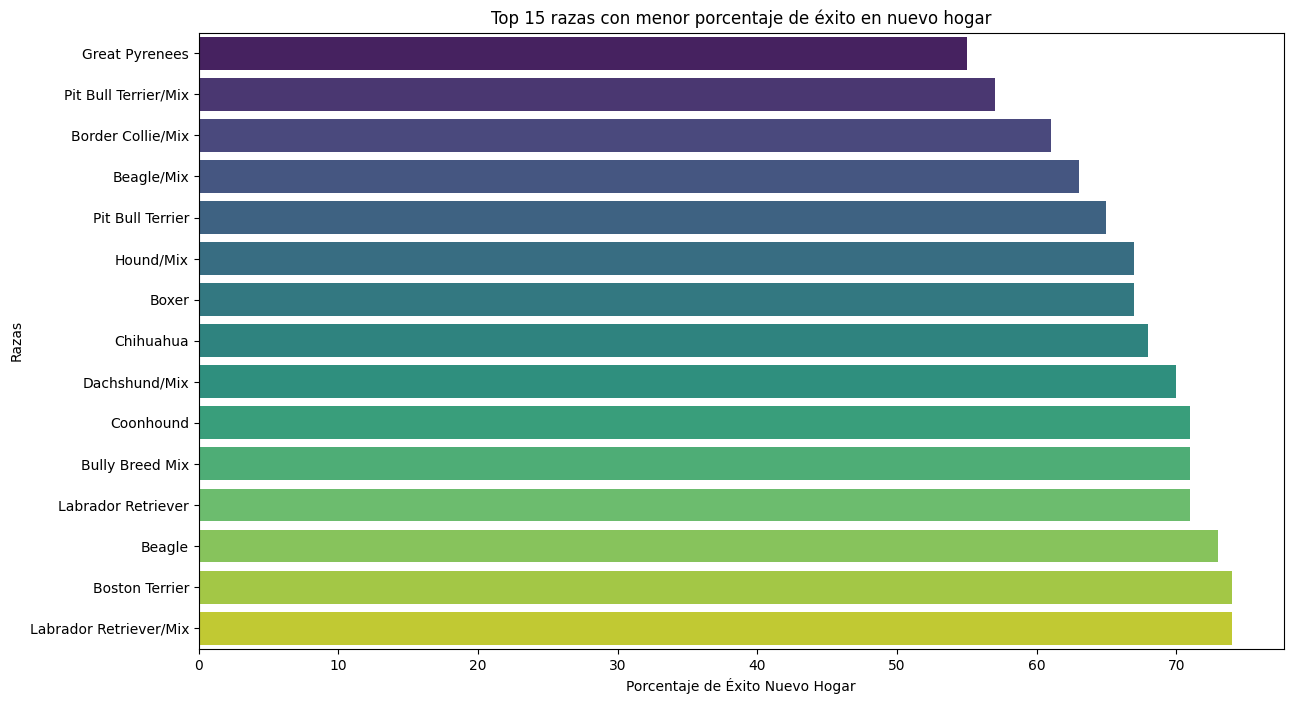

In [ ]:
# se crear el gráfico para razas con menor éxito

plt.figure(figsize=(14, 8))
sns.barplot(data=top_15_bajo, x='porcentaje de éxito nuevo hogar', y='razas', palette='viridis')
plt.title('Top 15 razas con menor porcentaje de éxito en nuevo hogar')
plt.xlabel('Porcentaje de Éxito Nuevo Hogar')
plt.ylabel('Razas')
plt.show()

**En cuanto a las razas, se confirmó que algunas de ellas
son adoptadas con mayor facilidad que otras. Las razas
como los Golden Retriever, Yorkshire Terrier o los Ovejero
Aleman, tienden a encontrar hogar de manera mas
sencilla con valores de éxito de adopción superior al 90%.**